In [44]:
import pandas as pd

# Load the dataset
df = pd.read_csv('simulated_call_centre.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51708 entries, 0 to 51707
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   call_id         51708 non-null  int64 
 1   date            51708 non-null  object
 2   daily_caller    51708 non-null  int64 
 3   call_started    51708 non-null  object
 4   call_answered   51708 non-null  object
 5   call_ended      51708 non-null  object
 6   wait_length     51708 non-null  int64 
 7   service_length  51708 non-null  int64 
 8   meets_standard  51708 non-null  bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 3.2+ MB
None
   call_id        date  daily_caller call_started call_answered  call_ended  \
0        1  2021-01-01             1   8:00:00 AM    8:00:00 AM  8:14:22 AM   
1        2  2021-01-01             2   8:02:42 AM    8:02:42 AM  8:07:31 AM   
2        3  2021-01-01             3   8:08:24 AM    8:08:24 AM  8:10:13 AM   
3        4  2021-01-01      

Average Wait Time: 17.41 seconds


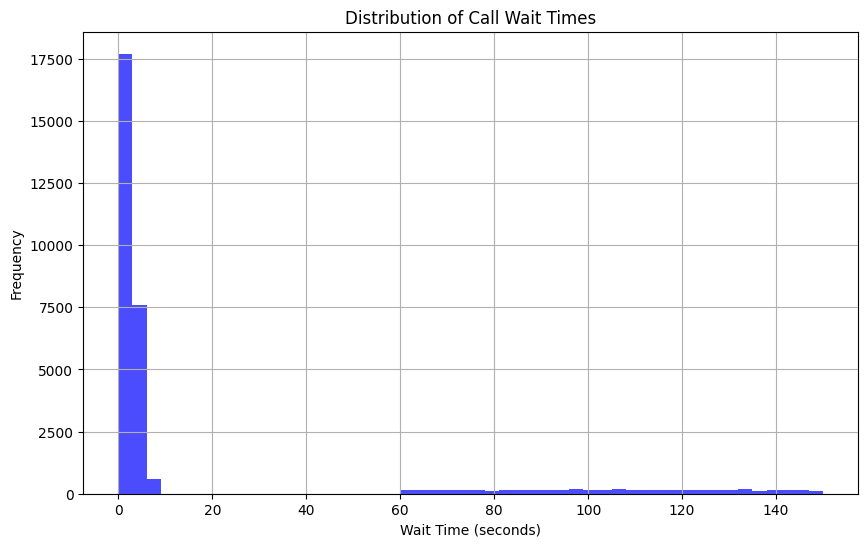

In [45]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Define the parameters for the simulation
num_agents = 4
arrival_rate = 1 / 5  # Calls arrive every 5 minutes on average
service_rate = 1 / 5  # Each call takes 5 minutes on average to resolve
operating_hours = 10  # Operating hours from 8 AM to 6 PM

# Initialize call queue
queue = []

# Simulate calls for a year (about 250 working days)
calls = []
base_date = pd.to_datetime('2021-01-01')  # Start date for simulation

# Set the desired mean wait time in seconds (mostly 0, occasional hiccups)
normal_mean_wait_time_seconds = 2  # Most waits will be very short, close to 0 seconds
normal_std_dev_wait_time_seconds = 2  # Small standard deviation for short waits

# Set parameters for the "hiccup" (large wait times)
hiccup_prob = 0.15  # 5% probability for a "hiccup"
hiccup_wait_time_range = (60, 150)  # Hiccups will have a wait time between 60 and 150 seconds

for day in range(250):  # 250 working days per year
    current_time = 8 * 60  # Start time at 8:00 AM (in minutes)
    end_time = 18 * 60  # End time at 6:00 PM
    
    # For each day, assign a different date
    current_date = base_date + pd.Timedelta(days=day)
    
    while current_time < end_time:
        # Simulate the arrival of a call
        inter_arrival_time = np.random.exponential(1 / arrival_rate)  # Exponential distribution for arrival
        current_time += inter_arrival_time
        
        # Simulate wait time: 95% normal small wait time, 5% large hiccup wait time
        if random.random() < hiccup_prob:  # 5% chance for a large hiccup
            wait_time = np.random.uniform(*hiccup_wait_time_range)  # Random wait time between 60 and 150 seconds
        else:
            wait_time = np.random.normal(normal_mean_wait_time_seconds, normal_std_dev_wait_time_seconds)
            # Ensure that the wait time is non-negative
            wait_time = max(wait_time, 0)
        
        # Simulate the service time
        service_time = np.random.exponential(1 / service_rate)  # Service time in minutes
        
        # Calculate the time when the call ends
        call_end_time = current_time + wait_time / 60 + service_time  # Convert wait_time to minutes
        
        calls.append({
            'call_id': len(calls) + 1,
            'date': current_date,  # Use the actual date for each call
            'call_started': current_time,
            'call_answered': current_time + wait_time / 60,
            'call_ended': call_end_time,
            'wait_length': wait_time,
            'service_length': service_time,
            'meets_standard': (wait_time <= 60)  # Meets the 1-minute rule (60 seconds)
        })
        
# Convert calls to DataFrame
simulated_df = pd.DataFrame(calls)

# Calculate the average wait time in seconds
average_wait_time = simulated_df['wait_length'].mean()
print(f"Average Wait Time: {average_wait_time:.2f} seconds")

# Plot the distribution of wait times
plt.figure(figsize=(10, 6))
plt.hist(simulated_df['wait_length'], bins=50, color='b', alpha=0.7)
plt.title('Distribution of Call Wait Times')
plt.xlabel('Wait Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Total Calls: 30394
Calls Meeting Standard: 25881
Calls Not Meeting Standard: 4513
Performance: 85.15167467263277%


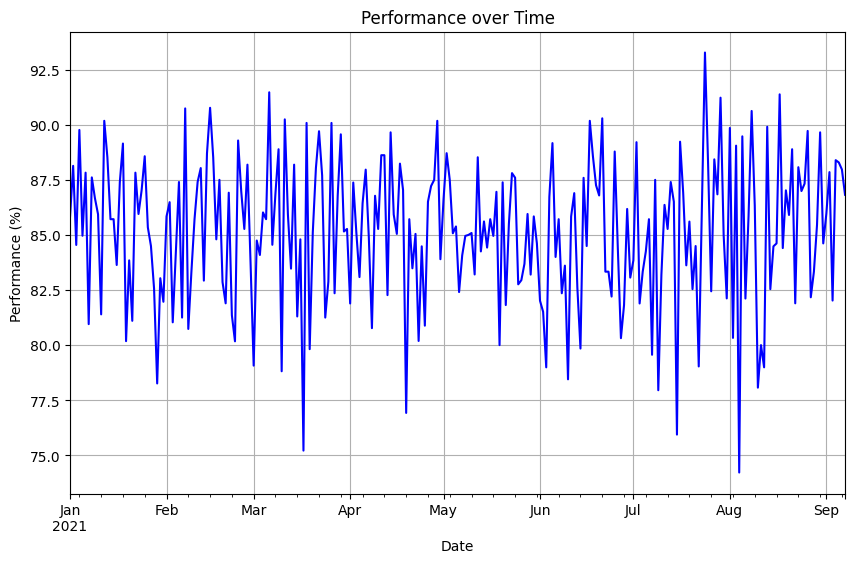

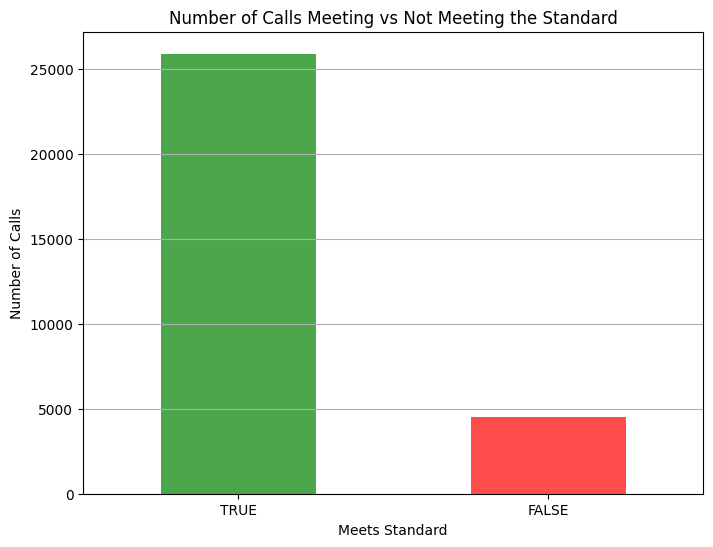

In [46]:
# Analyze the performance
total_calls = len(simulated_df)
calls_meeting_standard = simulated_df['meets_standard'].sum()
calls_not_meeting_standard = total_calls - calls_meeting_standard
performance_percentage = (calls_meeting_standard / total_calls) * 100

print(f"Total Calls: {total_calls}")
print(f"Calls Meeting Standard: {calls_meeting_standard}")
print(f"Calls Not Meeting Standard: {calls_not_meeting_standard}")
print(f"Performance: {performance_percentage}%")

# Plotting performance over time
performance_over_time = simulated_df.groupby('date')['meets_standard'].mean() * 100

plt.figure(figsize=(10, 6))
performance_over_time.plot(kind='line', color='b')
plt.title('Performance over Time')
plt.xlabel('Date')
plt.ylabel('Performance (%)')
plt.grid(True)
plt.show()

# Plotting the count of TRUE vs FALSE
performance_counts = simulated_df['meets_standard'].value_counts()

plt.figure(figsize=(8, 6))
performance_counts.plot(kind='bar', color=['g', 'r'], alpha=0.7)
plt.title('Number of Calls Meeting vs Not Meeting the Standard')
plt.xlabel('Meets Standard')
plt.ylabel('Number of Calls')
plt.xticks([0, 1], ['TRUE', 'FALSE'], rotation=0)
plt.grid(True, axis='y')
plt.show()


Average Wait Time: 12.00 seconds


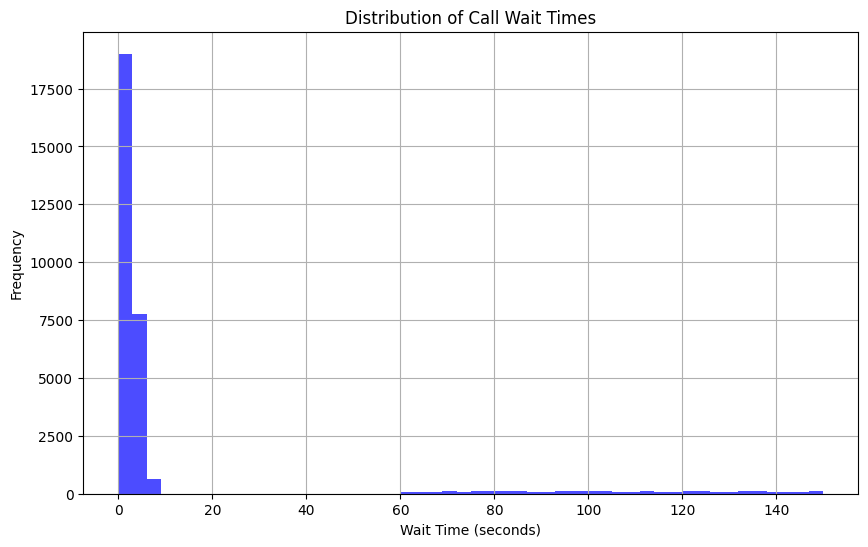

Total Calls: 30347
Calls Meeting Standard: 27438
Calls Not Meeting Standard: 2909
Performance: 90.41420898276601%


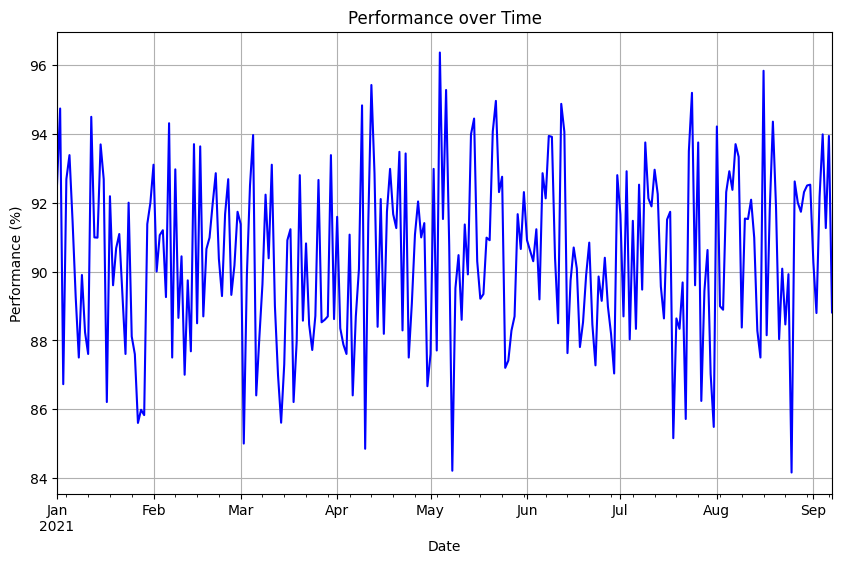

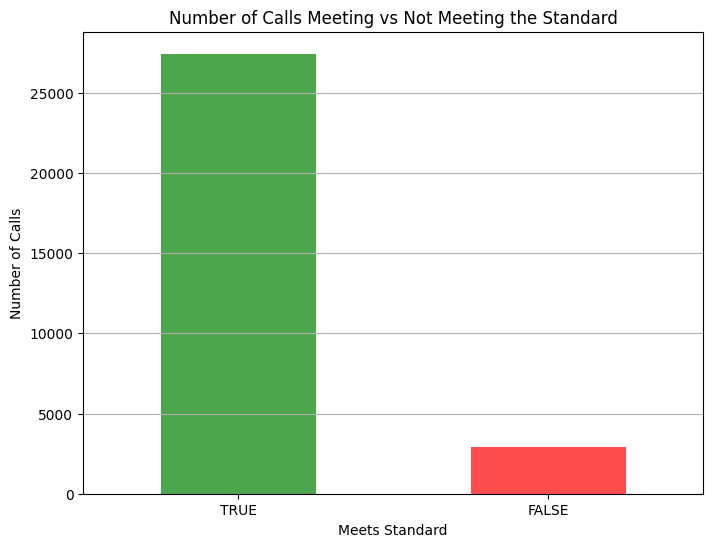

In [47]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Define the parameters for the simulation
num_agents = 6  # Increase the number of agents
arrival_rate = 1 / 5  # Calls arrive every 5 minutes on average
service_rate = 1 / 5  # Each call takes 5 minutes on average to resolve
operating_hours = 10  # Operating hours from 8 AM to 6 PM

# Initialize call queue
queue = []

# Simulate calls for a year (about 250 working days)
calls = []
base_date = pd.to_datetime('2021-01-01')  # Start date for simulation

# Set the desired mean wait time in seconds (mostly 0, occasional hiccups)
normal_mean_wait_time_seconds = 2  # Most waits will be very short, close to 0 seconds
normal_std_dev_wait_time_seconds = 2  # Small standard deviation for short waits

# Set parameters for the "hiccup" (large wait times)
hiccup_prob = 0.10  # 10% probability for a "hiccup" (increased from 5%)
hiccup_wait_time_range = (60, 150)  # Hiccups will have a wait time between 60 and 150 seconds

for day in range(250):  # 250 working days per year
    current_time = 8 * 60  # Start time at 8:00 AM (in minutes)
    end_time = 18 * 60  # End time at 6:00 PM
    
    # For each day, assign a different date
    current_date = base_date + pd.Timedelta(days=day)
    
    while current_time < end_time:
        # Simulate the arrival of a call
        inter_arrival_time = np.random.exponential(1 / arrival_rate)  # Exponential distribution for arrival
        current_time += inter_arrival_time
        
        # Simulate wait time: 90% normal small wait time, 10% large hiccup wait time (optimized)
        if random.random() < hiccup_prob:  # 10% chance for a large hiccup
            wait_time = np.random.uniform(*hiccup_wait_time_range)  # Random wait time between 60 and 150 seconds
        else:
            wait_time = np.random.normal(normal_mean_wait_time_seconds, normal_std_dev_wait_time_seconds)
            # Ensure that the wait time is non-negative
            wait_time = max(wait_time, 0)
        
        # Simulate the service time
        service_time = np.random.exponential(1 / service_rate)  # Service time in minutes
        
        # Calculate the time when the call ends
        call_end_time = current_time + wait_time / 60 + service_time  # Convert wait_time to minutes
        
        calls.append({
            'call_id': len(calls) + 1,
            'date': current_date,  # Use the actual date for each call
            'call_started': current_time,
            'call_answered': current_time + wait_time / 60,
            'call_ended': call_end_time,
            'wait_length': wait_time,
            'service_length': service_time,
            'meets_standard': (wait_time <= 60)  # Meets the 1-minute rule (60 seconds)
        })
        
# Convert calls to DataFrame
simulated_df = pd.DataFrame(calls)

# Calculate the average wait time in seconds
average_wait_time = simulated_df['wait_length'].mean()
print(f"Average Wait Time: {average_wait_time:.2f} seconds")

# Plot the distribution of wait times
plt.figure(figsize=(10, 6))
plt.hist(simulated_df['wait_length'], bins=50, color='b', alpha=0.7)
plt.title('Distribution of Call Wait Times')
plt.xlabel('Wait Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyze the performance
total_calls = len(simulated_df)
calls_meeting_standard = simulated_df['meets_standard'].sum()
calls_not_meeting_standard = total_calls - calls_meeting_standard
performance_percentage = (calls_meeting_standard / total_calls) * 100

print(f"Total Calls: {total_calls}")
print(f"Calls Meeting Standard: {calls_meeting_standard}")
print(f"Calls Not Meeting Standard: {calls_not_meeting_standard}")
print(f"Performance: {performance_percentage}%")

# Plotting performance over time
performance_over_time = simulated_df.groupby('date')['meets_standard'].mean() * 100

plt.figure(figsize=(10, 6))
performance_over_time.plot(kind='line', color='b')
plt.title('Performance over Time')
plt.xlabel('Date')
plt.ylabel('Performance (%)')
plt.grid(True)
plt.show()

# Plotting the count of TRUE vs FALSE
performance_counts = simulated_df['meets_standard'].value_counts()

plt.figure(figsize=(8, 6))
performance_counts.plot(kind='bar', color=['g', 'r'], alpha=0.7)
plt.title('Number of Calls Meeting vs Not Meeting the Standard')
plt.xlabel('Meets Standard')
plt.ylabel('Number of Calls')
plt.xticks([0, 1], ['TRUE', 'FALSE'], rotation=0)
plt.grid(True, axis='y')
plt.show()


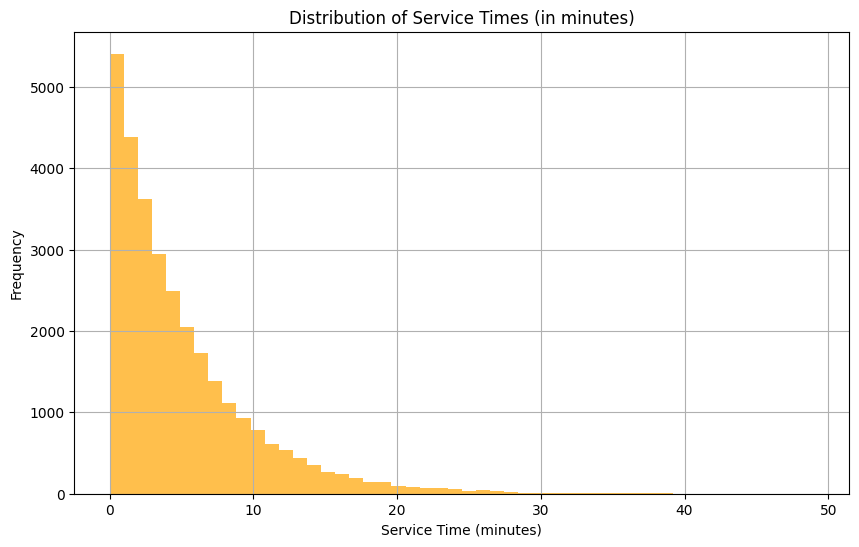

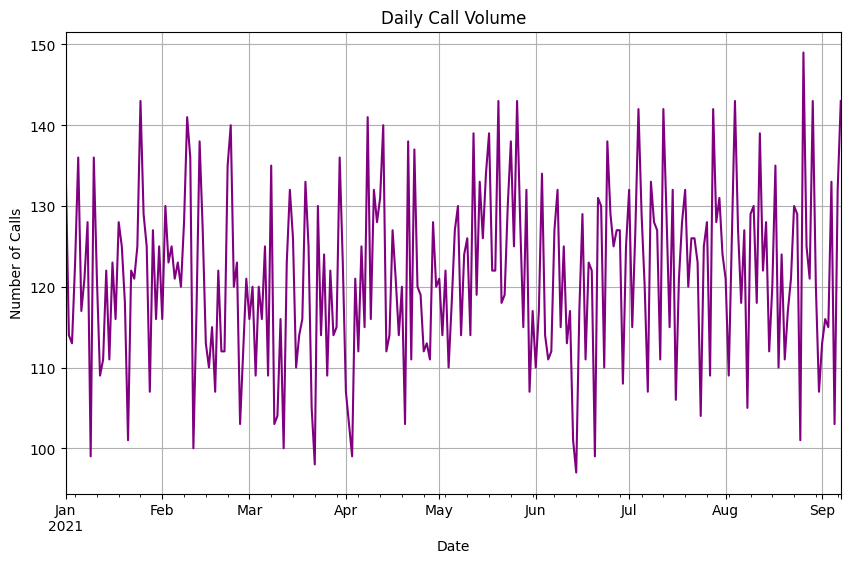

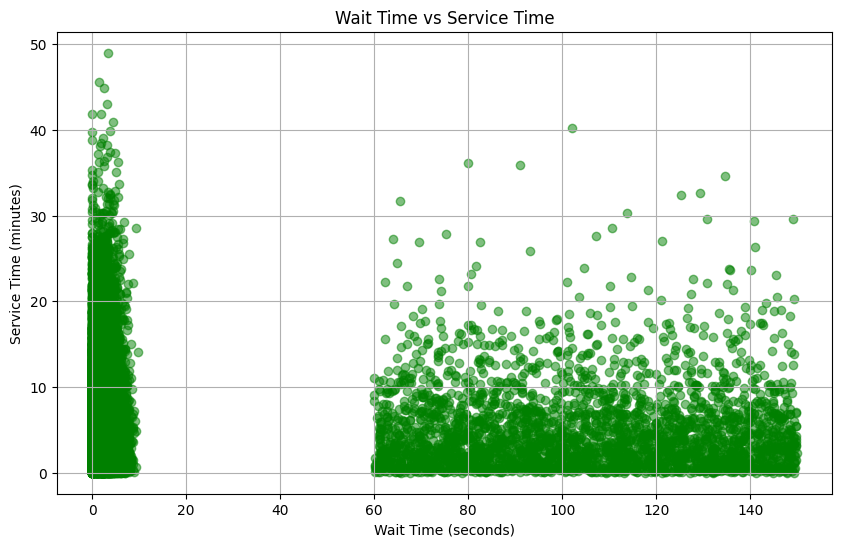

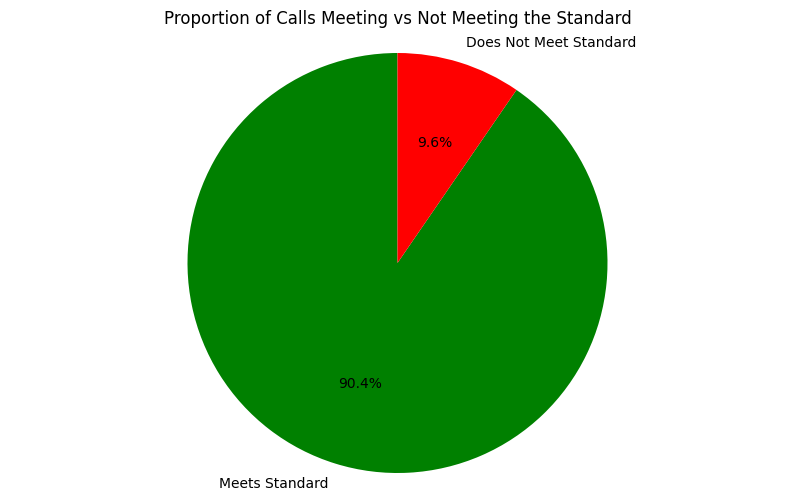

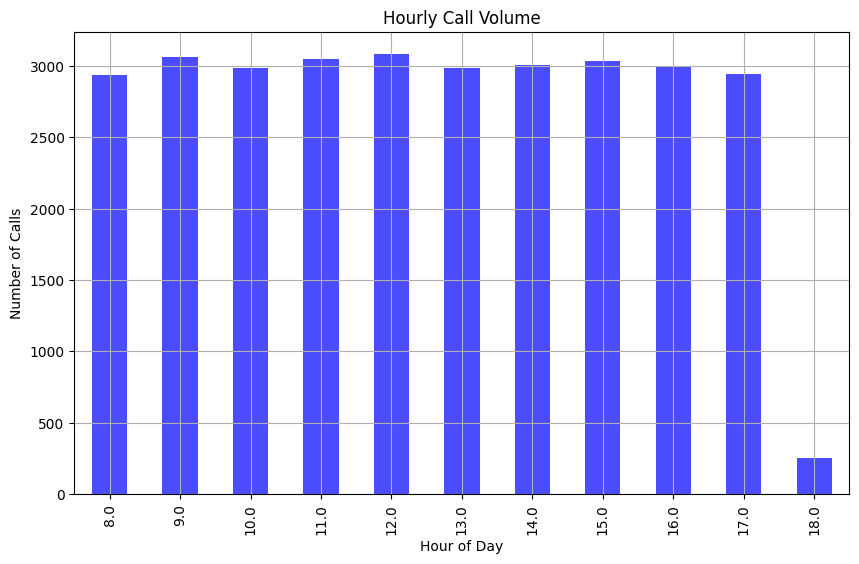

In [48]:
# Step 6: Plot Additional Insights

# 1. Service Time Distribution
plt.figure(figsize=(10, 6))
plt.hist(simulated_df['service_length'], bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Service Times (in minutes)')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Calls Handled Over Time (Daily call volume)
daily_call_volume = simulated_df.groupby('date').size()

plt.figure(figsize=(10, 6))
daily_call_volume.plot(kind='line', color='purple')
plt.title('Daily Call Volume')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

# 3. Correlation Between Wait Time and Service Time
plt.figure(figsize=(10, 6))
plt.scatter(simulated_df['wait_length'], simulated_df['service_length'], alpha=0.5, color='green')
plt.title('Wait Time vs Service Time')
plt.xlabel('Wait Time (seconds)')
plt.ylabel('Service Time (minutes)')
plt.grid(True)
plt.show()

# 4. Calls Answered vs Not Answered (Meets Standard vs Does Not Meet Standard)
calls_meeting_standard = simulated_df[simulated_df['meets_standard'] == True]
calls_not_meeting_standard = simulated_df[simulated_df['meets_standard'] == False]

plt.figure(figsize=(10, 6))
plt.pie([len(calls_meeting_standard), len(calls_not_meeting_standard)], labels=['Meets Standard', 'Does Not Meet Standard'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Proportion of Calls Meeting vs Not Meeting the Standard')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# 5. Hourly Call Volume (How many calls were made in each hour)
simulated_df['hour_of_day'] = simulated_df['call_started'] // 60  # Convert call started time to hours
hourly_call_volume = simulated_df.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
hourly_call_volume.plot(kind='bar', color='b', alpha=0.7)
plt.title('Hourly Call Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()
